# Measure the computing performance (time, memory) of the model of septoria

## Benchmark for various numbers of plants, phyto-elements by leaf, initial number of lesions by leaf

In [101]:
import matplotlib.pyplot as plt


In [108]:
%load_ext rmagic
import pandas as pd
df = pd.DataFrame.from_csv('bench.txt',sep=',',index_col=None)

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [109]:
import pandas.rpy.common as com
r_df = com.convert_to_r_dataframe(df)

Residual Standard Error=801.3295
R-Square=0.8283
F-statistic (df=1, 44)=212.2793
p-value=0

          Estimate  Std.Err t-value Pr(>|t|)
Intercept 344.0281 164.9085  2.0862   0.0428
X         282.4351  19.3850 14.5698   0.0000





Call:
lm(formula = time ~ plant + lesion:plant, data = r_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-604.48 -401.35  -36.71  219.37 1826.30 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   347.790    104.284   3.335  0.00176 ** 
plant         179.198     17.586  10.190 4.86e-13 ***
plant:lesion   24.701      3.017   8.187 2.58e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 506.7 on 43 degrees of freedom
Multiple R-squared:  0.9329,	Adjusted R-squared:  0.9298 
F-statistic: 298.9 on 2 and 43 DF,  p-value: < 2.2e-16



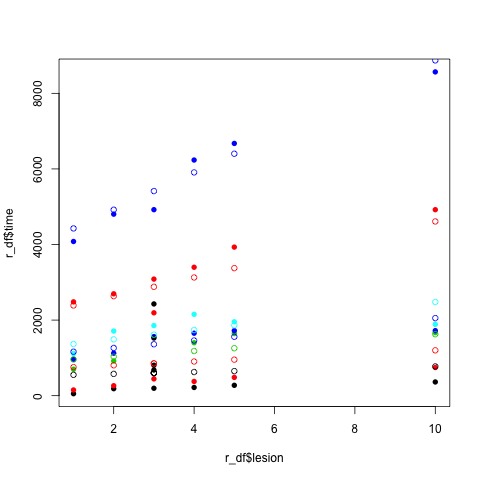

In [110]:
%Rpush r_df
%R ls.print(lsfit(r_df$plant,r_df$time))
%R fit = lm(time~plant+lesion:plant,data=r_df)
%R print(summary.lm(fit))
%R plot(r_df$lesion, r_df$time,col=r_df$plant,pch=16);points(r_df$lesion,predict(fit),col=r_df$plant)
#%R lapply(split(r_df,r_df$plant),function(x) lines(x$lesion,predict(fit,x$lesion)))

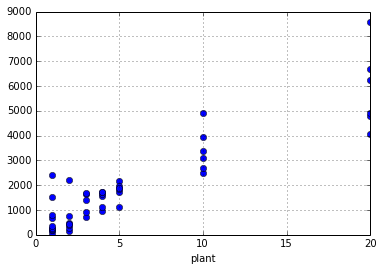

In [111]:
%matplotlib inline
df.plot(y='time', x='plant',style='o')

In [112]:
df=df.sort(['plant','lesion'])

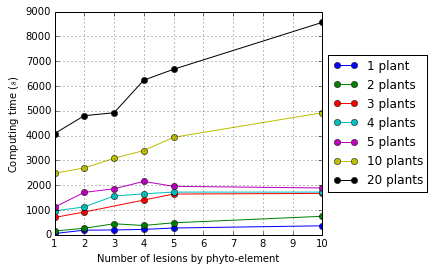

In [149]:
plt.figure()
#dfp = (df[df.phytomer==1& (df.plant <=5)]).groupby('plant')
dfp = (df[df.phytomer==1]).groupby('plant')

axes = dfp.plot(y='time', x='lesion', kind='line',style='o-')
ax=axes[1]
ax.set_xlabel('Number of lesions by phyto-element ')
ax.set_ylabel('Computing time ($s$)')
#ax.set_xticks([1, 2, 3, 4, 5])
patches, labels = ax.get_legend_handles_labels()
indices = axes.axes[0].tolist()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(patches, ['%d plant'%i if i == 1 else '%d plants'%i for i in indices],
          loc='center left', bbox_to_anchor=(1, 0.5))


#df.groupby('plant').plot(y='time', x='lesion', kind='line',style='o-')

#plt.legend(loc='best')
#df.groupby('phytomer').plot(y='time', x='plant')
#df.plot(y='time', x='plant', kind='scatter')

In [150]:
ax.figure.savefig('benchmark.png', dpi=300)

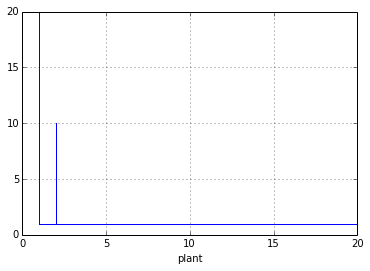

In [135]:
df.plot(y='phytomer', x='plant')

In [7]:
df['ppl']=df.ppl

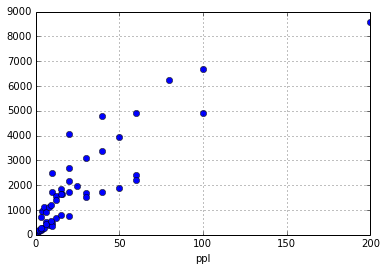

In [9]:
df.sort('ppl')
df.plot(x='ppl',y='time', style='o')

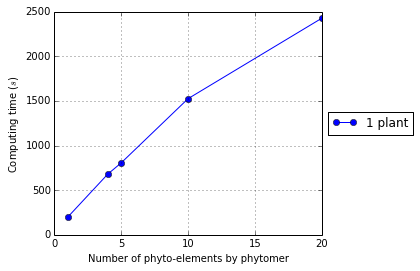

In [155]:
ax=(df[(df.plant==1)&(df.lesion==3)]).plot(y='time', x='phytomer',style='o-')
ax.set_xlabel('Number of phyto-elements by phytomer ')
ax.set_ylabel('Computing time ($s$)')

patches, labels = ax.get_legend_handles_labels()
#indices = ax.tolist()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(patches, ['1 plant'],
          loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.savefig('benchmark2.png', dpi=300)
#(df).groupby('plant').plot(y='time', x='phytomer')

In [145]:
df[(df.plant==1)&(df.lesion==3)]

plant  phytomer  lesion         time
4       1         1       3   196.352517
40      1         4       3   679.455057
41      1         5       3   805.253789
42      1        10       3  1525.118101
43      1        20       3  2427.388019

[5 rows x 4 columns]